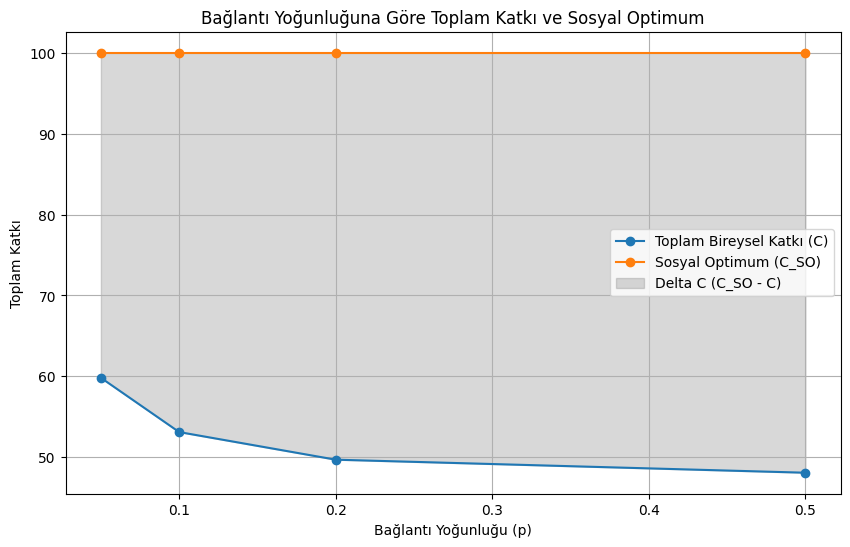

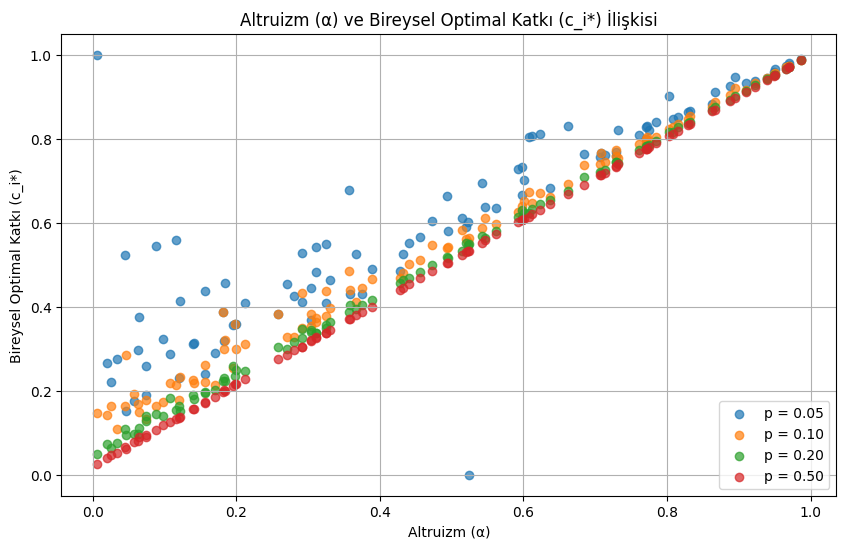

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Parametreler
N = 100  # Oyuncu sayısı
p_values = [0.05, 0.1, 0.2, 0.5]  # Bağlantı yoğunluğu (p değerleri)
beta = 2  # Kamu malı çarpanı
theta = 2  # Maliyet fonksiyonu parametresi

# Heterojen parametreler (alpha ve e)
np.random.seed(42)
alpha = np.random.uniform(0, 1, size=N)  # Altruizm parametresi
e = np.random.uniform(100, 200, size=N)  # Başlangıç gelirleri

# Sonuçları saklama
results = []

for p in p_values:
    # Erdős-Rényi ağı oluştur
    G = nx.erdos_renyi_graph(N, p)

    # Bireysel optimal katkılar (c_i^*)
    c_optimal = np.zeros(N)
    for i in range(N):
        N_i = len(list(G.neighbors(i)))  # Komşu sayısı
        if N_i > 0:
            c_optimal[i] = (beta * (1 + alpha[i] * (N_i - 1)) / (theta * N_i)) ** (1 / (theta - 1))
        else:
            c_optimal[i] = 0

    # Sosyal optimum katkı
    c_social_optimal = (beta / theta) ** (1 / (theta - 1))
    C_social_optimal = N * c_social_optimal

    # Toplam bireysel katkı
    C_individual = np.sum(c_optimal)

    # Sonuçları sakla
    results.append({
        "p": p,
        "C_individual": C_individual,
        "C_social_optimal": C_social_optimal,
        "delta_C": C_social_optimal - C_individual,
        "c_optimal": c_optimal,
    })

# Görselleştirme
# 1. Toplam katkı (C) ve sosyal optimum (C_SO) farkı
p_vals = [r["p"] for r in results]
C_vals = [r["C_individual"] for r in results]
C_SO_vals = [r["C_social_optimal"] for r in results]
delta_C_vals = [r["delta_C"] for r in results]

plt.figure(figsize=(10, 6))
plt.plot(p_vals, C_vals, label="Toplam Bireysel Katkı (C)", marker='o')
plt.plot(p_vals, C_SO_vals, label="Sosyal Optimum (C_SO)", marker='o')
plt.fill_between(p_vals, C_vals, C_SO_vals, color='gray', alpha=0.3, label="Delta C (C_SO - C)")
plt.title("Bağlantı Yoğunluğuna Göre Toplam Katkı ve Sosyal Optimum")
plt.xlabel("Bağlantı Yoğunluğu (p)")
plt.ylabel("Toplam Katkı")
plt.legend()
plt.grid()
plt.show()

# 2. Altruizm ve bireysel katkı ilişkisi
plt.figure(figsize=(10, 6))
for r in results:
    plt.scatter(alpha, r["c_optimal"], label=f"p = {r['p']:.2f}", alpha=0.7)
plt.title("Altruizm (\u03B1) ve Bireysel Optimal Katkı (c_i*) İlişkisi")
plt.xlabel("Altruizm (\u03B1)")
plt.ylabel("Bireysel Optimal Katkı (c_i*)")
plt.legend()
plt.grid()
plt.show()
